In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [2]:
filename = "Population estimates by gender nationality and region 2010 - 2022_data.csv"

df = pd.read_csv(filename)
df["Year"] = df["Year"].str.replace(",", '')
df["Population estimates"] = df["Population estimates"].str.replace(",", '')
df["Year"]=df["Year"].astype(int)
df["Population estimates"]=df["Population estimates"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    int32 
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int32 
dtypes: int32(2), object(3)
memory usage: 21.2+ KB


In [3]:
df["Region"] = LabelEncoder().fit_transform(df["Region"])
df["Nationality"] = LabelEncoder().fit_transform(df["Nationality"])
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

In [4]:
scaler = MinMaxScaler()
X_std = scaler.fit_transform(df)

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [8]:
exp_var_tsne = tsne.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

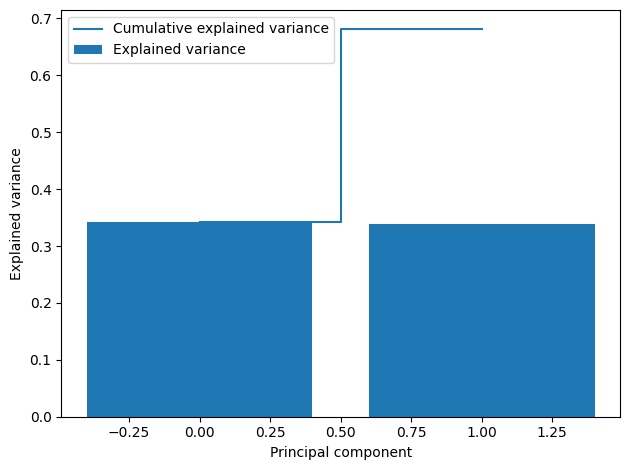

In [12]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [13]:
X = df.drop(['Year'], axis = 1)
y = df["Year"]
print(X.shape)

(676, 4)


Component 0  Component 1  year
0    3.627101e+03    -0.002915  2014
1   -3.189249e+05     6.367474  2010
2   -3.469899e+05    -1.600126  2013
3    7.497501e+05    -3.865481  2016
4   -5.417659e+05    -5.373246  2018
..            ...          ...   ...
671  1.197657e+06    -0.380065  2015
672 -4.541929e+05    -5.482470  2015
673  9.973610e+04    -0.118880  2021
674 -5.143009e+05     6.594963  2020
675  1.194441e+06    -0.370804  2015

[676 rows x 3 columns]

(-816619.3491068518, 3132320.5106551386)
(-6.054768447411856, 7.266777950416937)


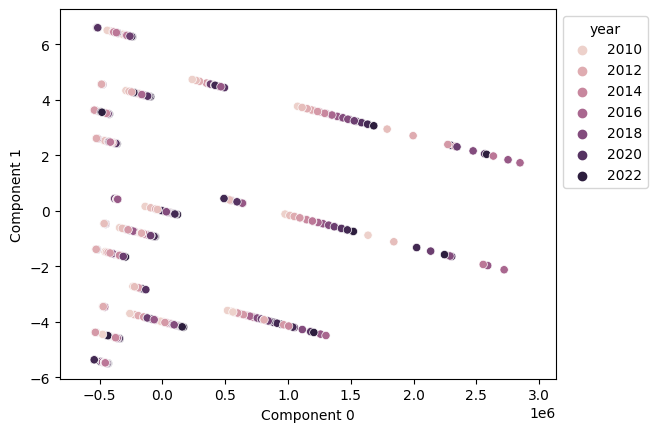

In [73]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
pca_data = pd.DataFrame({"Component 0": pca_result[:, 0], "Component 1": pca_result[:, 1], "year": df["Year"]})
display(pca_data)
min_val_x = pca_data["Component 0"].min()
max_val_x = pca_data["Component 0"].max()
min_val_y = pca_data["Component 1"].min()
max_val_y = pca_data["Component 1"].max()
limx = (1.5*min_val_x, 1.1*max_val_x)
limy = (1.1*min_val_y, 1.1*max_val_y)
print(limx)
print(limy)
plt.figure()
scatter = sns.scatterplot(x='Component 0', y='Component 1', hue='year', data=pca_data)
sns.move_legend(scatter, "upper left", bbox_to_anchor = (1, 1))
scatter.set_xlim(limx)
scatter.set_ylim(limy)
scatter.set_aspect('auto')
plt.show()

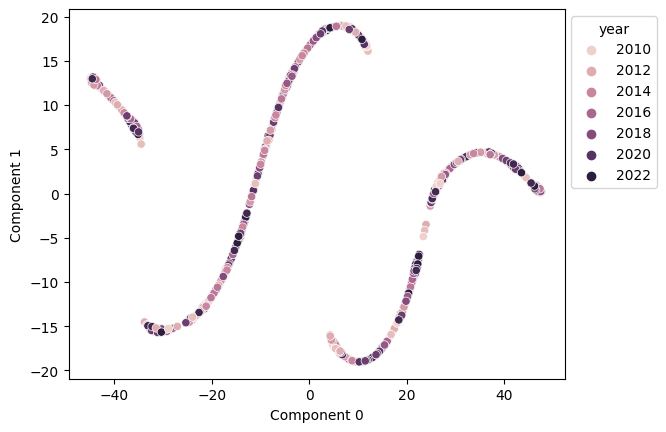

In [80]:
tsne = TSNE(n_components=2, random_state= 10)
tsne_result = tsne.fit_transform(X)
tsne_data = pd.DataFrame({"Component 0": tsne_result[:, 0], "Component 1": tsne_result[:, 1], "year": df["Year"]})
min_val_x = tsne_data["Component 0"].min()
max_val_x = tsne_data["Component 0"].max()
min_val_y = tsne_data["Component 1"].min()
max_val_y = tsne_data["Component 1"].max()
limx = (1.1*min_val_x, 1.1*max_val_x)
limy = (1.1*min_val_y, 1.1*max_val_y)
plt.figure()
scatter = sns.scatterplot(x='Component 0', y='Component 1', hue='year', data=tsne_data)
sns.move_legend(scatter, "upper left", bbox_to_anchor = (1, 1))
scatter.set_xlim(limx)
scatter.set_ylim(limy)
scatter.set_aspect('auto')
plt.show()


In [85]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [83]:
def show_images(images):
    plt.figure(figsize = (15, 15))
    for i, (num, image) in enumerate(images.items()):
        plt.subplot(3, 2, i + 1)
        plt.imshow(image)
        plt.title(str(num) + " colors")
        plt.axis("off")
    plt.show()

In [81]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

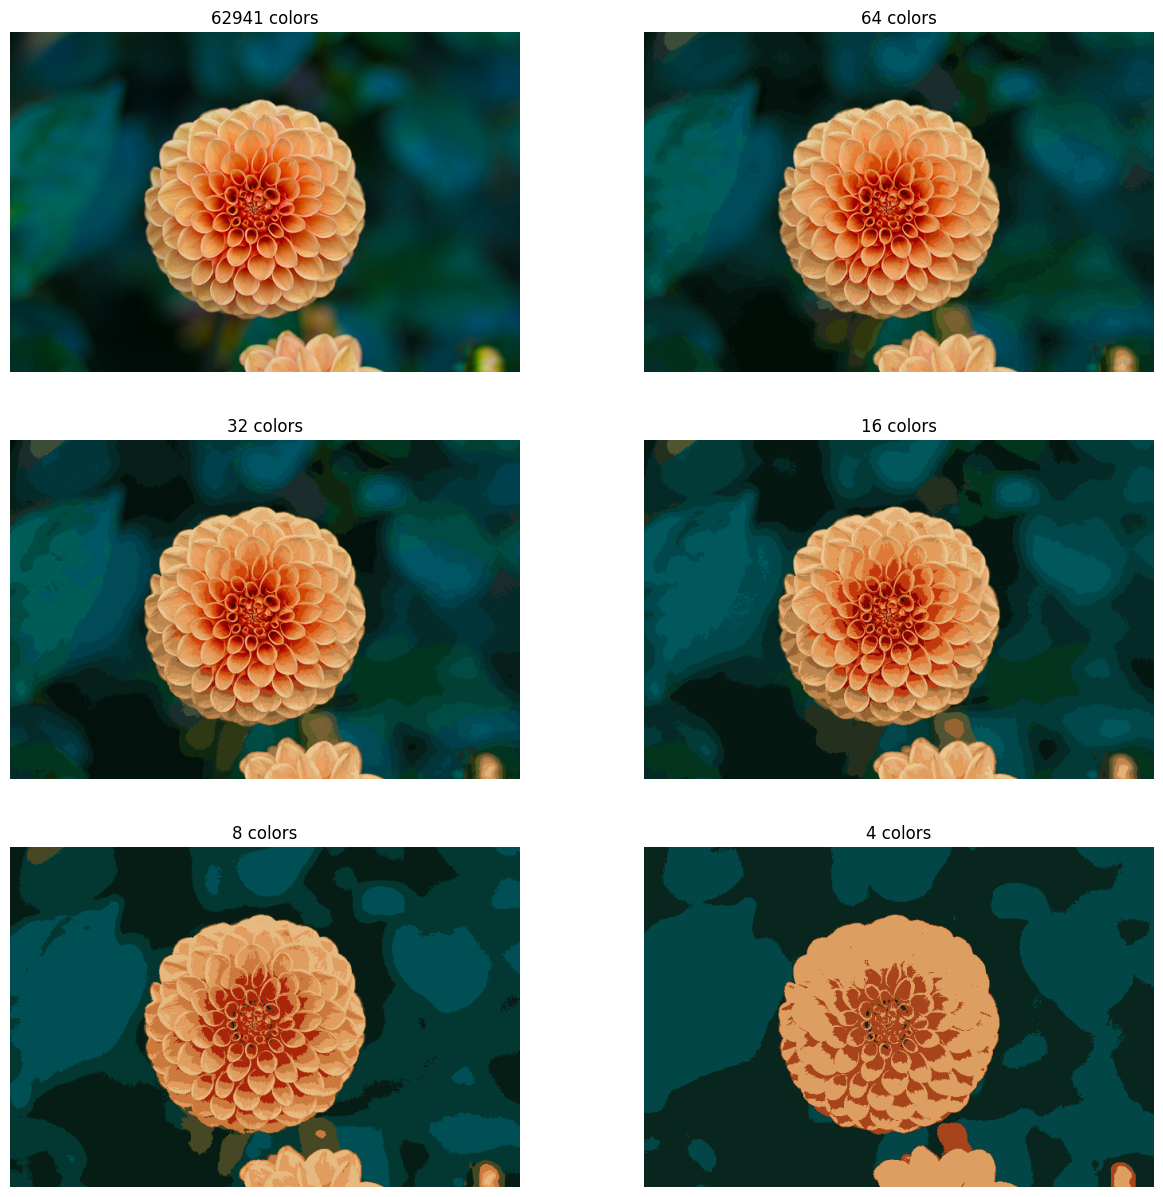

In [87]:
image = load_sample_image("flower.jpg")
image = np.array(image, dtype=np.float64) / 255
w, h, d = tuple(image.shape)
pixels = np.reshape(image, (w * h, d))
colors = np.unique(pixels, axis = 0)
colors_num = len(colors)
image_array_sample = shuffle(pixels, random_state=10, n_samples=1000)
images = {colors_num: image}
for i in [64, 32, 16, 8, 4]:
    kmeans = KMeans(n_clusters= i, n_init=10, random_state= 10).fit(image_array_sample)
    labels = kmeans.predict(pixels)
    recreated_image = recreate_image(kmeans.cluster_centers_, labels, w, h)
    images[i] = recreated_image
show_images(images)


In [7]:
import re
import string
from wordcloud import WordCloud

import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Люциус\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Люциус\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Люциус\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data = pd.read_json("data.json", lines=True, encoding = "latin-1")
data = data[["rented for", "review_text"]]

In [4]:
print(data.head())
print(data.info())
unique = data["rented for"].unique()
print("Unique classes:", unique)
classes = ['vacation', 'other', 'date', 'work']
data = data[data["rented for"].isin(classes)]
new_unique = data["rented for"].unique()
print("New unique classes:", new_unique)


      rented for                                        review_text
0       vacation  An adorable romper! Belt and zipper were a lit...
1          other  I rented this dress for a photo shoot. The the...
2          party  This hugged in all the right places! It was a ...
3  formal affair  I rented this for my company's black tie award...
4        wedding  I have always been petite in my upper body and...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   rented for   192534 non-null  object
 1   review_text  192544 non-null  object
dtypes: object(2)
memory usage: 2.9+ MB
None
Unique classes: ['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan 'party: cocktail']
New unique classes: ['vacation' 'other' 'date' 'work']


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41893 entries, 0 to 192540
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rented for   41893 non-null  object
 1   review_text  41893 non-null  object
dtypes: object(2)
memory usage: 981.9+ KB


In [5]:
stop_words = stopwords.words('english')
def text_cleaner(text):
    text = text.lower()
    text = re.sub("\d", "", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), "", text)
    text = re.sub('\n', "", text)
    text = re.sub('\s{2,}',"", text)
    text_tokens = word_tokenize(text)
    filtered_text = []
    for w in text_tokens:
        if w not in stop_words:
            filtered_text.append(w)
    stemmer = PorterStemmer()
    text = [stemmer.stem(t) for t in filtered_text]
    return text

# punktuations = punkt.words('english')



In [25]:
print(data.head())
data["review_text"] = data["review_text"].apply(text_cleaner)
print(data.head())

   rented for                                        review_text
0    vacation  ador romper belt zipper littl hard navig full ...
1       other  rent dress photo shoot theme hollywood glam bi...
5        date  didnt actual wear fit perfectli fabric littl t...
16   vacation  dress darl would absolut wear fit true size li...
21      other  wore dress daughter baptism perfect formal day...
   rented for                                        review_text
0    vacation  [ador, romper, belt, zipper, littl, hard, navi...
1       other  [rent, dress, photo, shoot, theme, hollywood, ...
5        date  [didnt, actual, wear, fit, perfectli, fabric, ...
16   vacation  [dress, darl, would, absolut, wear, fit, true,...
21      other  [wore, dress, daughter, baptism, perfect, form...


In [23]:
def show_wordcloud(texts, rented_for):
    wordcloud = WordCloud(font_path='DejaVuSans.ttf', width = 500, height = 300, background_color = "black")
    wordcloud = wordcloud.generate(texts)
    plt.figure()
    plt.title("Rented for: " + rented_for)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

ador romper belt zipper littl hard navig full day wearbathroom use expect wish pocket absolut perfect got million compliment dress darl would absolut wear fit true size littl room larger hip dress fit fine highlight smaller waistit isnt tight around middl realli comfort one wore dinner vega realli felt amaz dress fit great ride walk didnt let get look greatw concert night stop impromptu renew vow elvisthi dress fun ad tone even love dress summer vacat felt eleg materi thick enough abl wear type undergar downsid middl button chest would come undon sometim still one favorit dress rent rtr incr comfort realli flatter wore brunch vacat highli recommend comfort cute transit perfectli day even pub crawl new orlean didnt get backup dress look onlin like would charg extra backup small enough couldnt zip unwear wore disneyworld perfect lightweight forgiv happi definit rent spring thought overlay go gold bronzecopp shoe challeng love romper wore coupl night vacat good wear amand right length oth

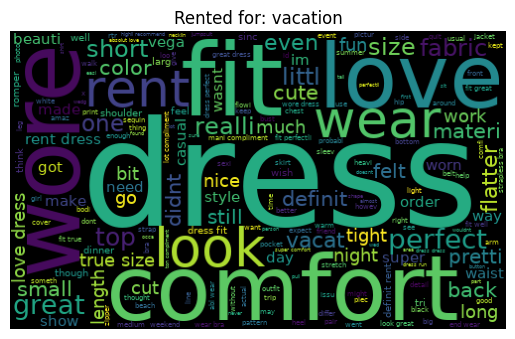

rent dress photo shoot theme hollywood glam big beauti hat dress comfort easi move around definit list rent anoth formal event wore dress daughter baptism perfect formal daytim affair felt fashion put togeth despit flu receiv mani compliment pair dress nude pump absolut beauti dress detail incr prosuniqu eleg sophisticatedconsextrem tight bust area wear bra pad still extrem tight dont know size would ideal everi portion dress fit well dress fit well classi feel itrent meet attend great occa wore wed shower perfect great length bust fit great sleev werent tight love end go medium sinc fit better think would troubl zip small daughter time squat put car seat cautiou flash anyon avoid situat pretti easilybetween top skirt thick seem fine thicker torso might tight got lot complement rent wear daughter baptismit great dress sinc wear regular bra itth alin made easi camouflag lower belli pooch wider hipsi love look much bought itit favorit datenight dress warm comfort stylish far look good ev

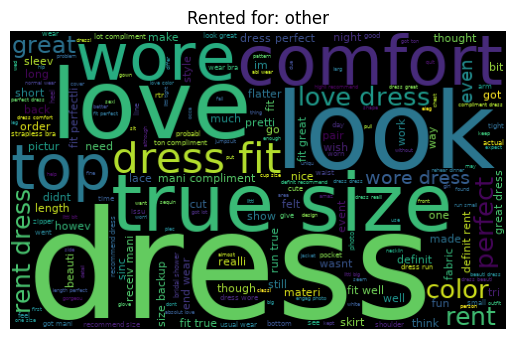

didnt actual wear fit perfectli fabric littl thicker higher qualiti felt bit conserv tast rent color love berri shade red rent birthday dinner downtown restaur love everi minut jumpsuit super flatter sexi classi comfort downsid zipper like girl mention difficult zip highli recommend definit rent dress extrem flatter comfort love uniqu design simpl run true size recommend size backup great cup size fabric stretchi worn strapless bra pair gold cuff bracelet want want want thick cabl soft great wear dress simpl classi came kneesi thought would shorterit nice hope dress worn anniversari dinner littl apprehen lace dress sinc usual unforgiv uncomfort line littl number made great im short girl aboutand slit came pretti high wasnt issu cover lap napkin seat dinner cut low low larger bust littl strap adjust girl sat nice downfal low necklin littl spillag larger bust sit still enough issu would rent love dress cinch perfectli waist nice detail bust waist even pocket dress low cut expect wear wit

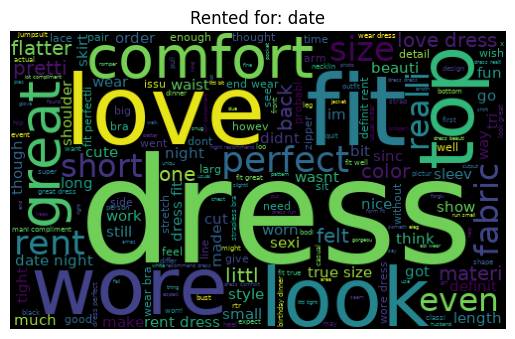

super cute love thelength sleev wider sleev alway want someth shorter doesnt drag wore black pant pump offic could dress jean didnt hate iron much shirt definit need iron would bought gather sleev prevent big overallnot wear highwaist pant youll show stomach ladi smaller across shoulder could probabl size one like over fit love everyth dress well made great color combinationpictur dont justic issu babi hide area need hidingbecau way skirt shape made look slightli bigger think top drop tad longer would look better fault dress bodi work well style rent rent worki want transit piec would work cold morn also someth wouldnt die duringth afternoon warm upthi dress perfect materi light coverag dress balanc outth fit super flatter felt thini got compliment day long wish kept longer like one thought would afraid would short fine work materi nicer expect realli cute print love asymmetr cut run littl larg long amandlb tad big long over still great dress work materi pretti thick would great spring

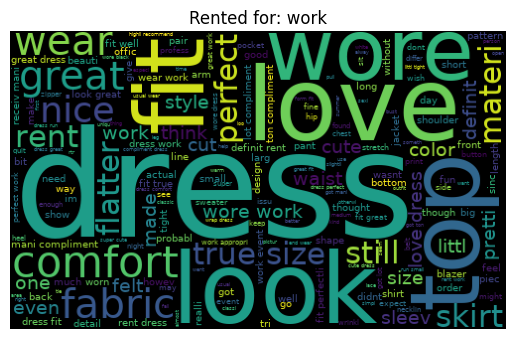

In [26]:
for classe in classes:
    texts = data[data["rented for"] == classe]["review_text"].sum()
    texts = " ".join(texts)
    print(texts)
    show_wordcloud(texts, classe)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
data["review_text"] = data["review_text"].apply(" ".join)

In [19]:
data["review_text"].head()

0     ador romper belt zipper littl hard navig full ...
1     rent dress photo shoot theme hollywood glam bi...
5     didnt actual wear fit perfectli fabric littl t...
16    dress darl would absolut wear fit true size li...
21    wore dress daughter baptism perfect formal day...
Name: review_text, dtype: object

In [22]:
train, test = train_test_split(data, test_size = 0.4)
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(train["review_text"])
tfidf_test =  tfidf_vectorizer.transform(test["review_text"])

clf = LogisticRegression(max_iter = 1000).fit(tfidf_train, train["rented for"])

predicted = clf.predict(tfidf_test)
print(classification_report(test["rented for"], predicted))

              precision    recall  f1-score   support

        date       0.48      0.22      0.30      3034
       other       0.58      0.64      0.61      6083
    vacation       0.69      0.26      0.38      1614
        work       0.56      0.75      0.64      6027

    accuracy                           0.57     16758
   macro avg       0.58      0.47      0.48     16758
weighted avg       0.57      0.57      0.54     16758

